This is needed to reload modules without restarting the kernel

In [1]:
%load_ext autoreload
%autoreload 2

This is needed to add eda_tools from the directories above

In [2]:
import os
os.sys.path.append('../../')

In [5]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplhep as hep
hep.set_style('ATLAS')

# Investigating features for reweighting

Let's explore some extra features for the reweighting

In [4]:
!ls -lh /mnt/storage/lborgna/NNT/MDR_VEC/data/data_CRVRSR_16.root

-rw-r--r-- 1 lborgna users 421M Apr 14 11:06 /mnt/storage/lborgna/NNT/MDR_VEC/data/data_CRVRSR_16.root


In [6]:
f = uproot.open('/mnt/storage/lborgna/NNT/MDR_VEC/data/data_CRVRSR_16.root')

In [7]:
f.keys()

[b'control;1', b'validation;1', b'sig;1']

In [8]:
df = f['control'].pandas.df()

In [37]:
df['min_quantile'] = np.min(df[['quantile_h1_j1','quantile_h1_j2','quantile_h2_j1','quantile_h2_j2']], axis=1)

In [38]:
df['min_quantile'].value_counts()

1    1016004
2      11111
3       4083
5       2577
4       2446
Name: min_quantile, dtype: int64

In [40]:
df.loc[(df.ntag==2),'min_quantile'].value_counts()

1    1016004
2       2461
Name: min_quantile, dtype: int64

In [44]:
df.loc[(df.ntag==2),
       ['quantile_h1_j1','quantile_h1_j2','quantile_h2_j1','quantile_h2_j2']].value_counts()

quantile_h1_j1  quantile_h1_j2  quantile_h2_j1  quantile_h2_j2
5               1               5               1                 327093
                5               1               1                 182265
1               1               5               5                 133024
5               1               4               1                  43547
4               1               5               1                  40655
                                                                   ...  
2               2               3               4                      8
                                4               3                      6
4               3               2               2                      4
                4               2               2                      4
2               2               4               4                      4
Length: 108, dtype: int64

In [46]:
df.loc[(df.ntag>=4),
       ['quantile_h1_j1','quantile_h1_j2','quantile_h2_j1','quantile_h2_j2']].value_counts()

quantile_h1_j1  quantile_h1_j2  quantile_h2_j1  quantile_h2_j2
5               5               5               5                 2577
                                                4                  490
                                                3                  483
                4               5               5                  451
4               5               5               5                  424
                                                                  ... 
3               3               3               4                    4
                4               4               3                    3
                                                4                    3
                3               4               4                    3
4               4               4               4                    2
Length: 81, dtype: int64

In [41]:
df.loc[(df.ntag>=4),'min_quantile'].value_counts()

3    4083
5    2577
4    2446
Name: min_quantile, dtype: int64

In [10]:
df['quantile_h1_j1'].value_counts()

5    679525
1    200950
4     88183
3     59713
2      7850
Name: quantile_h1_j1, dtype: int64

In [12]:
df['quantile_h1_j2'].value_counts()

1    713621
5    236767
2     38360
4     28726
3     18747
Name: quantile_h1_j2, dtype: int64

In [11]:
df['quantile_h2_j1'].value_counts()

5    618107
1    260388
4     88152
3     59467
2     10107
Name: quantile_h2_j1, dtype: int64

In [13]:
df['quantile_h2_j2'].value_counts()

1    772983
5    178978
2     41321
4     25455
3     17484
Name: quantile_h2_j2, dtype: int64

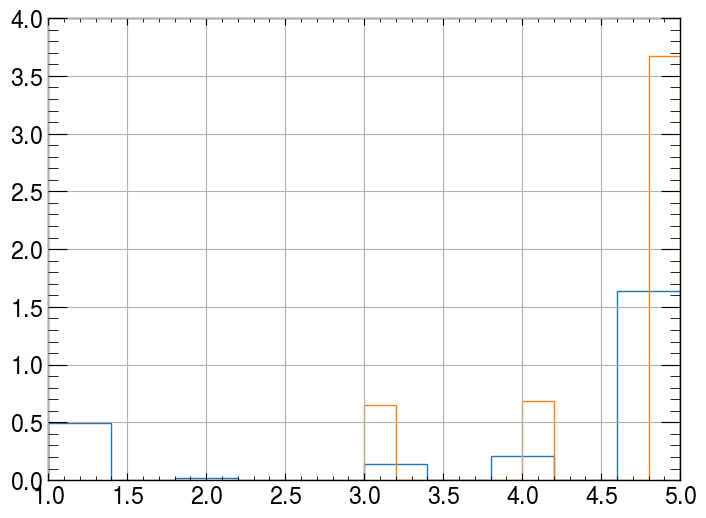

In [15]:
df.loc[df.ntag==2, 'quantile_h1_j1'].hist(histtype='step',density=True)
df.loc[df.ntag>=4, 'quantile_h1_j1'].hist(histtype='step',density=True)

In [16]:
(df.ntag==2).value_counts()

True     1018465
False      17756
Name: ntag, dtype: int64

In [20]:
df.loc[df.ntag==2,'quantile_h1_j2'].value_counts()

1    713621
5    227015
2     34349
4     26733
3     16747
Name: quantile_h1_j2, dtype: int64

In [19]:
df.loc[df.ntag>=4, 'quantile_h1_j2'].value_counts()

5    6494
3    1317
4    1295
Name: quantile_h1_j2, dtype: int64

Text(0.5, 1.0, 'quantile information 2b vs 4b')

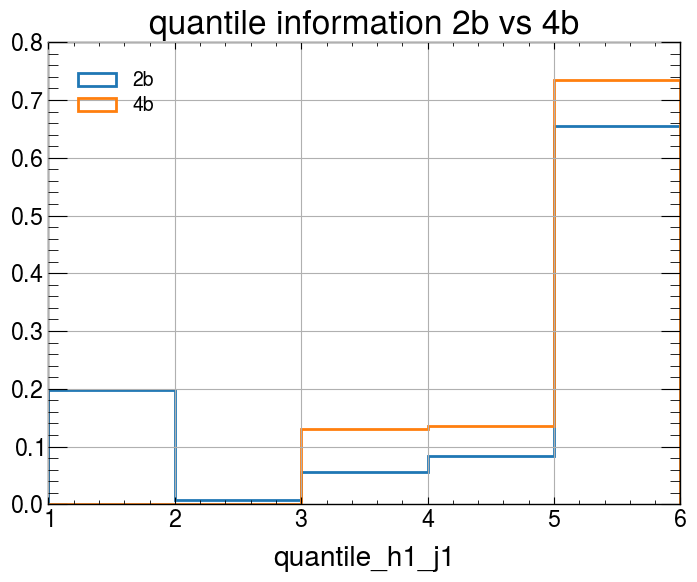

In [54]:
df.loc[df.ntag==2, 'quantile_h1_j1'].hist(histtype='step',lw=2,bins = [1,2,3,4,5,6],density=True, label = '2b')
df.loc[df.ntag>=4, 'quantile_h1_j1'].hist(histtype='step',lw=2,bins = [1,2,3,4,5,6],density=True, label = '4b')
plt.legend(loc='upper left')
plt.xlabel('quantile_h1_j1')
plt.title('quantile information 2b vs 4b')

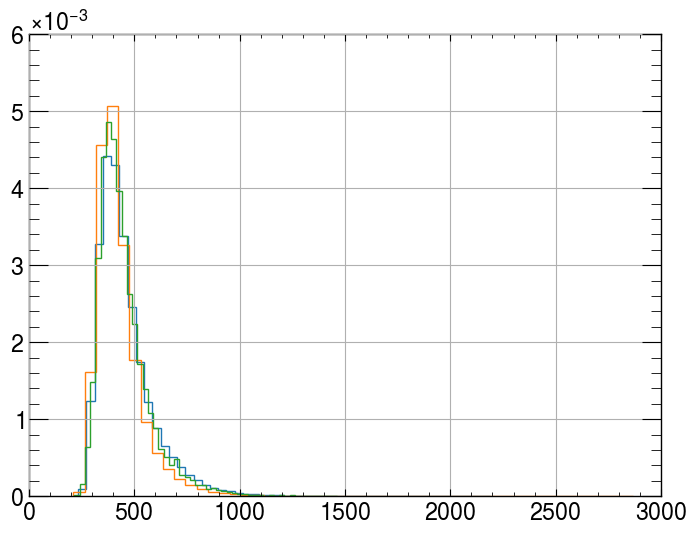

In [24]:
df.loc[(df.ntag==2) & (df['quantile_h1_j1'] <3), 'm_hh'].hist(histtype='step', density= True, bins=50)
df.loc[(df.ntag==2) & (df['quantile_h1_j1'] >=3), 'm_hh'].hist(histtype='step', density= True, bins=50)
df.loc[(df.ntag>=4), 'm_hh'].hist(histtype='step',density=True,bins=50)


Text(0.5, 0, 'pairing_score_1')

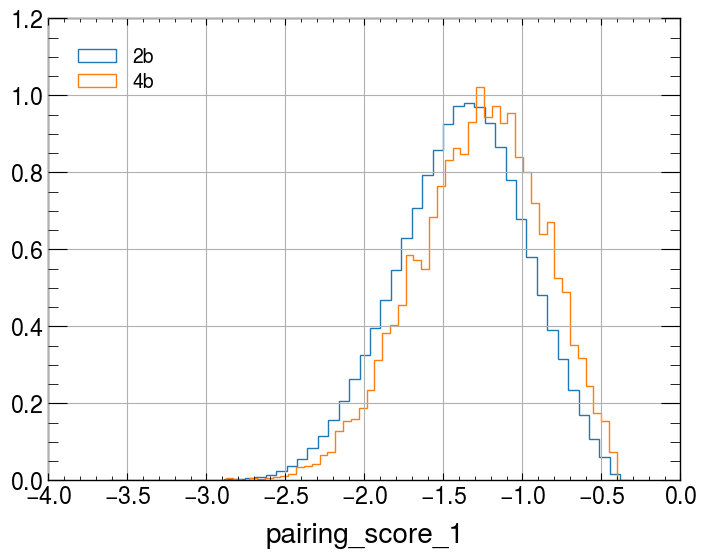

In [31]:
df.loc[df.ntag==2, 'pairing_score_1'].hist(histtype='step',density=True, bins = 50, label = '2b')
df.loc[df.ntag>=4, 'pairing_score_1'].hist(histtype='step',density=True, bins = 50, label = '4b')
plt.legend()
plt.xlabel('pairing_score_1')

Text(0.5, 0, 'pairing_score_2')

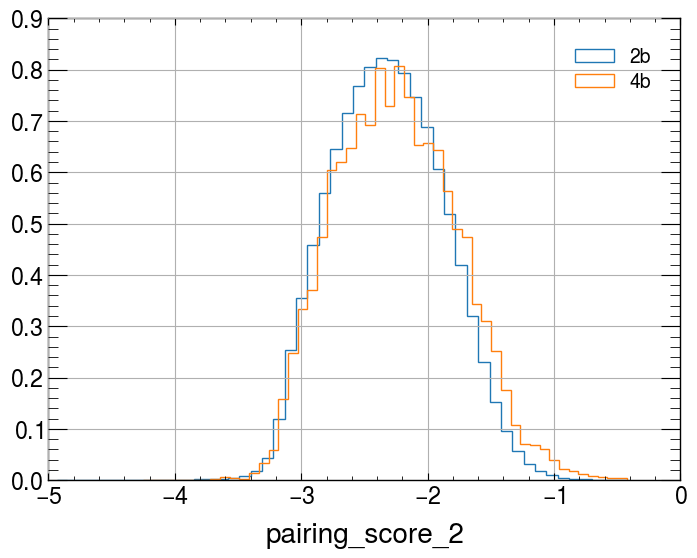

In [32]:
df.loc[df.ntag==2, 'pairing_score_2'].hist(histtype='step',density=True, bins = 50, label = '2b')
df.loc[df.ntag>=4, 'pairing_score_2'].hist(histtype='step',density=True, bins = 50, label = '4b')
plt.legend()
plt.xlabel('pairing_score_2')

Text(0.5, 0, 'bkt_HT')

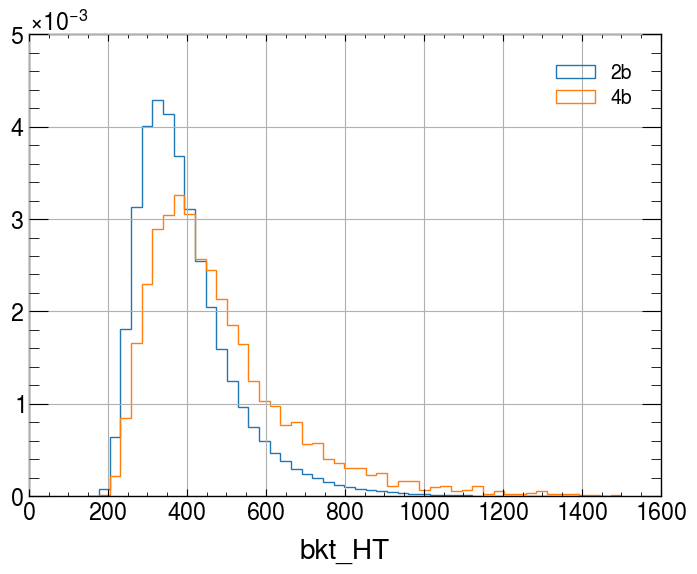

In [57]:
be = np.linspace(150, 1500, 51)
df.loc[df.ntag==2, 'bkt_HT'].hist(histtype='step',density=True, bins = be, label = '2b')
df.loc[df.ntag>=4, 'bkt_HT'].hist(histtype='step',density=True, bins = be, label = '4b')
plt.legend()
plt.xlabel('bkt_HT')

Text(0.5, 0, 'bkt_lead_jet_pt')

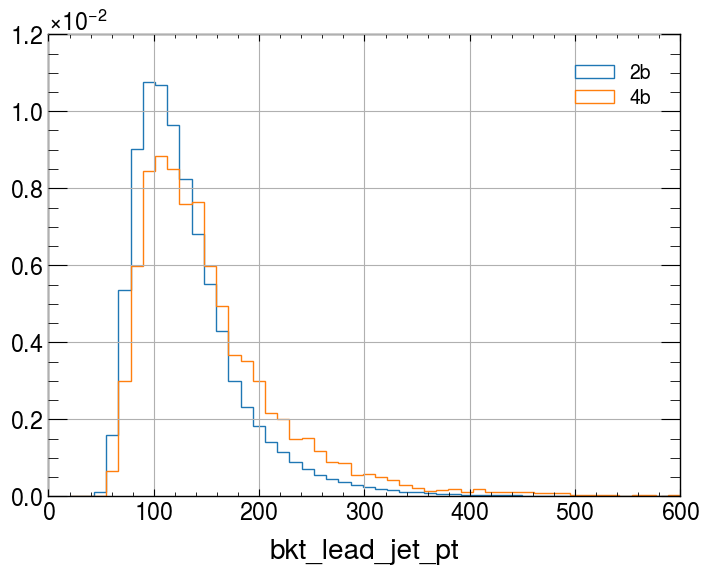

In [62]:
be = np.linspace(20, 600, 51)
df.loc[df.ntag==2, 'bkt_lead_jet_pt'].hist(histtype='step',density=True, bins = be, label = '2b')
df.loc[df.ntag>=4, 'bkt_lead_jet_pt'].hist(histtype='step',density=True, bins = be, label = '4b')
plt.legend()
plt.xlabel('bkt_lead_jet_pt')